In [1]:
from glob import glob

import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
calibs = sorted(glob('*calib') + glob('*calib2') + glob('*calib3') + glob('*calib4'))
calibs

['U2719D_calib',
 'U2719D_calib2',
 'U2719D_calib3',
 'U2719D_calib4',
 'spectre_x360_oled_calib',
 'spectre_x360_oled_calib2',
 'spectre_x360_oled_calib3',
 'spectre_x360_oled_calib4']

1/2 were less controlled, with room lights on, etc.  3/4 were lower-left/upper-right with lights off

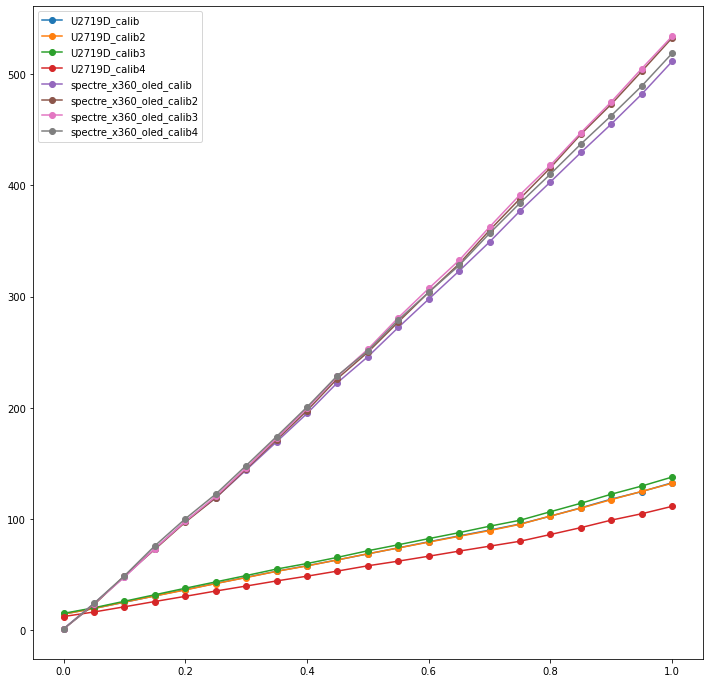

In [3]:
plt.figure(figsize=(12, 12))

for calib in calibs:
    frac,lux = np.loadtxt(calib, skiprows=1).T
    plt.plot(frac, lux, 'o-', label=calib)
    
plt.legend(loc=0)

In [17]:
fits = {}
for name in ('spectre', 'U2719D'):
    fracs = []
    luxs = []
    for calib in calibs:
        if name in calib:
            frac, lux = np.loadtxt(calib, skiprows=1).T
            fracs = np.concatenate((fracs, frac))
            luxs = np.concatenate((luxs, lux))

    fits[name] = np.polyfit(fracs, luxs, deg=1)
fits

{'spectre': array([523.65886504,  -7.21466223]),
 'U2719D': array([110.92339449,  12.4286479 ])}

$l_1 = a_1 f_1 + b_1$

$l_2 = a_2 f_2 + b_2$

assume $l1 = l_2$, get $f_2 = a f_1 + b$

$a_1 f_1 + b_1 = a_2 f_2 + b_2$

$ a_1 f_1 = a_2 f_2 + b_2 - b_1$

$f_1 = \frac{a_2}{a_1} f_2 + \frac{b_2 - b_1}{a_1}$

$a = \frac{a_2}{a_1}$ and $b=\frac{b_2 - b_1}{a_1}$

In [22]:
a1, b1 = fits['spectre']
a2, b2 = fits['U2719D']
a = a2/a1
b = (b2-b1)/a1
a, b

(0.21182376905860953, 0.037511653943657866)

Now assume backlight maximum of 2047 and brightness max of 100:

$x_l = m_l f_1$, $x_r = m_r f_2$

$\frac{x_l}{m_l} = a \frac{x_r}{m_r} + b$

$x_l =  \frac{m_l}{m_r} \frac{a_2}{a_1} x_r + m_l \frac{b_2 - b_1}{a_1}$

In [26]:
def xl(xr, ml=2047, mr=100):
    return (ml/mr)*a*xr + ml * b

xl(100)

510.38961088564133